MSDS 432 Mini Assignment 2


Prepared by Vincent Pun

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

import pandas as pd
from pandas import Categorical 
from pandas.plotting import scatter_matrix

import seaborn as sns
import scipy.stats as stats

import os
import time
from datetime import datetime

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In this exercise, we will begin to explore computational complexity and explore the differences in various sorting and search algorithms.  We will begin with the base code for Selection Sort as described in Chapter 2 of Grokking Algorithms (Bhargava 2016) which can be found here:  https://github.com/egonSchiele/grokking_algorithms/blob/master/02_selection_sort/python/01_se (https://github.com/egonSchiele/grokking_algorithms/blob/master/02_selection_sort/python/01_selection_so There is Extra Credit for this assignment, so please read it through before starting, as doing the extra work will change some of the outputs.


1. We will again generate random data for this assignment.  Please set up five data arrays of length
5,000, 10,000, 15,000, 20,000, and 25,000 of uniformly distributed random numbers (you may use either integers or floating point).  Ensure that a common random number seed is used to generate each of the arrays.


In [26]:
#Random number seed is used to generate each of the arrays 
np.random.seed(123)

#Five arrays, each of length 5000, 10000, 15000, 20000, 25000
#containing randomly generated uniformly distributed integers from 1 to 10
#Use numpy package for this


array1 = np.random.uniform(low=0,high=10,size=5000)

array2 = np.random.uniform(0,10,10000)

array3 = np.random.uniform(0,10,15000)

array4 = np.random.uniform(0,10,20000)

array5 = np.random.uniform(0,10,25000)


2. Execute the base algorithm (Selection Sort) for each of the random number arrays, noting the
execution time with each execution. Use one of the timing methods we learned in class. 

In [24]:
# Finds the smallest value in an array

def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index


#Selection Sort 

# Sort array
def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr

print(selectionSort([5, 3, 6, 2, 10]))



[2, 3, 5, 6, 10]


In [25]:
start1=time.time()
selectionSort_A1 = selectionSort(list(array1))
end1=time.time()

start2=time.time()
selectionSort_A2 = selectionSort(list(array2))
end2=time.time()

start3=time.time()
selectionSort_A3 = selectionSort(list(array3))
end3=time.time()

start4=time.time()
selectionSort_A4 = selectionSort(list(array4))
end4=time.time()

start5=time.time()
selectionSort_A5 = selectionSort(list(array5))
end5=time.time()

sort_time1=1000*(end1-start1)
sort_time2=1000*(end2-start2)
sort_time3=1000*(end3-start3)
sort_time4=1000*(end4-start4)
sort_time5=1000*(end5-start5)

#Sort Times
sort_time1
sort_time2
sort_time3
sort_time4
sort_time5

842.5500392913818

3705.9450149536133

8055.833101272583

14180.676937103271

21095.56770324707

In [45]:
#Using numpy's optimized/built-in sorting function (as a comparison since this method doesn't require the underlying data to be in a list data type)

start1=time.time()
numpysort_A1 = np.sort(array1)
end1=time.time()

start2=time.time()
numpysort_A2 = np.sort(array2)
end2=time.time()

start3=time.time()
numpysort_A3 = np.sort(array3)
end3=time.time()

start4=time.time()
numpysort_A4 = np.sort(array4)
end4=time.time()

start5=time.time()
numpysort_A5 = np.sort(array5)
end5=time.time()

npsort_time1=1000*(end1-start1)
npsort_time2=1000*(end2-start2)
npsort_time3=1000*(end3-start3)
npsort_time4=1000*(end4-start4)
npsort_time5=1000*(end5-start5)

#Sort Times
npsort_time1
npsort_time2
npsort_time3
npsort_time4
npsort_time5


0.47898292541503906

1.0020732879638672

1.4736652374267578

2.3839473724365234

3.464221954345703

3. Just as in the last assignment, please organize the results of the study into a table showing the size
of data array and the time taken to sort the array. Discuss the differences in timing and how they
relate to data type and length of array. 

In [46]:
#Size of data array
#Time taken to sort the array 
#Differences in timing and how they relate to data type and length of array 

length = [5000, 10000, 15000, 20000, 25000]
sort_time_list = [sort_time1,sort_time2,sort_time3,sort_time4,sort_time5]
numpysort_time_list = [npsort_time1, npsort_time2, npsort_time3, npsort_time4, npsort_time5]
table = pd.DataFrame(list(zip(length,sort_time_list, numpysort_time_list)),columns=['Array Length','Selection Sort Time','Numpy Built-In'])

table

,Array Length,Selection Sort Time,Numpy Built-In
0,5000,842.550039,0.478983
1,10000,3705.945015,1.002073
2,15000,8055.833101,1.473665
3,20000,14180.676937,2.383947
4,25000,21095.567703,3.464222


4. Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal
axis and with execution time in milliseconds on the vertical axis. The plot should show execution time
against problem size for each form of the algorithm being tested.


Text(0.5, 0, 'Input Size')

Text(0, 0.5, 'Execution Time (ms)')

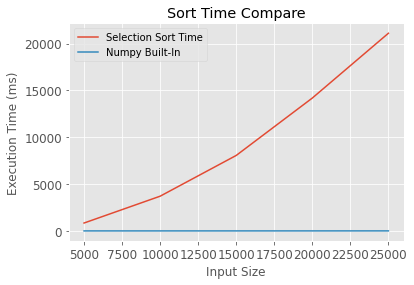

In [47]:
plt.style.use('ggplot')

ax = table[['Array Length', 'Selection Sort Time', 'Numpy Built-In']].plot.line(x='Array Length', title='Sort Time Compare')
ax.set_xlabel('Input Size')
ax.set_ylabel('Execution Time (ms)')
plt.show()

Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.
Program code should conform to best practices in software development, as described in the coding/software development textbook used in the course.
Utilize Git as your version control for software developed for this mini programming assignment.


**Executive Summary**

In [48]:
print('l')

l
